***2. In this question, you will use the Iris data set (“from sklearn.datasets import load_iris”). ***

In [ ]:
from sklearn.datasets import load_iris
from sklearn import metrics, neighbors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
#print(iris.feature_names)
#print(iris.data[0:1])
#print(iris.target)
#print(iris.data.shape)


***a. Use a confusion matrix to evaluate the use of logistic regression to classify the iris data set.***

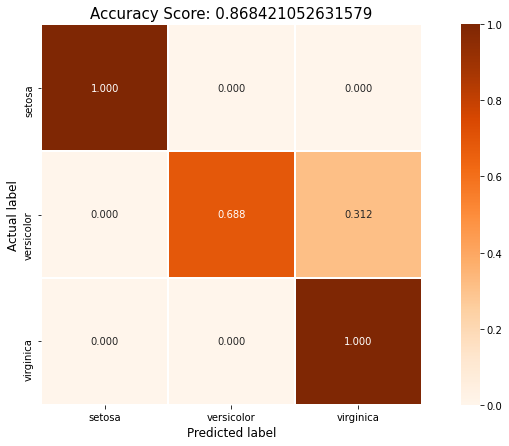

In [ ]:
#LOGISTIC REGRESSION

# Divide the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=0)
class_names = iris.target_names

# create and train our model
logistic_reg = LogisticRegression(multi_class='ovr', solver='liblinear')
logistic_reg.fit(x_train, y_train)

# From new data it will predict the label/name 
logistic_reg.predict(x_test[0].reshape(1,-1))

# Predict for Multiple Observations at once / on all test data (array x_test) 
predictions = logistic_reg.predict(x_test)
#print(x_test)

# Use the score method to get the accuracy of model
score = logistic_reg.score(x_test, y_test)
#print(score)


#NORMALIZED CONFUSION MATRIX

#plotting a confusion matrix, a table that describes the performance of a classifier on a set of test data for which the true values are known.
confmatr = metrics.confusion_matrix(y_test, predictions, normalize='true')


fig, ax1 = plt.subplots(figsize=(14,7))
sns.heatmap(confmatr, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Oranges')
ax1.set_xticklabels(class_names)
ax1.set_yticklabels(class_names)
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)
plt.ylabel('Actual label',size=12)
plt.xlabel('Predicted label',size=12)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show(); 

We can see that some tests intendend to be Versicolor but were misclassified as Virginica (seen as middle right square 0.312).


***b. Use k-nearest neighbours to classify the iris data set with some different values for k, and with uniform and distance-based weights. What will happen when k grows larger for the different cases? Why?***


We want to test the accuracy for different values of k so we make a loop. 

We also want to do this for both uniform wights (all neighborhood points have an equall weight)
and distance-based weight (neighborhood have different weight values, closer neighbors of a query point will have a greater influence than neighbors which are further away).

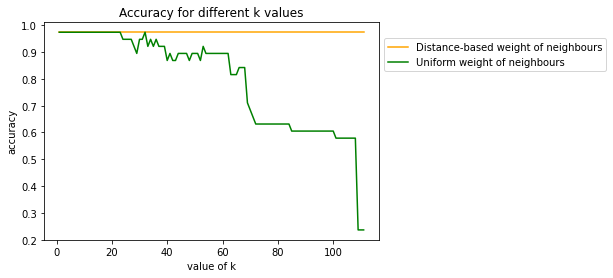

In [ ]:
#class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)

#plt.figure(figsize=(10,14))
for weight in ['distance','uniform']:
    k = list(range(1, 112))
    accuracy = []
    for i in k:
        #Create KNN Classifier
        knn = KNeighborsClassifier(n_neighbors=i,weights=weight) 
        #Train the model using the training sets
        knn.fit(x_train, y_train)

        #Predict the response for test dataset
        y_pred = knn.predict(x_test)

        # Model Accuracy, how often is the classifier correct?
        accuracy.append(metrics.accuracy_score(y_test, y_pred))
        
    if weight == 'distance':
        l1, = plt.plot(k,accuracy, label='Distance-based weight of neighbours',color='orange')
    else:
        l2, = plt.plot(k,accuracy, label='Uniform weight of neighbours', color='green')
    plt.xlabel('value of k')
    plt.ylabel('accuracy')
    plt.title('Accuracy for different k values')

plt.legend(handles=[l1,l2],bbox_to_anchor=(1,0.95), loc='upper left')
plt.show()


For a distance-based weight of neighbours the accuracy stay the same.
Even though the number of neighbours increase the classification will be influenced less by them 
when they are at a greater distance.

When k increases for uniform weighted neighbours we see a decrease of accuracy.
The accuracy is pretty good up until considering half of the neighbours but make a large drop after this. 
This is very logical since it takes a k number of neighbours into consideration and 
predict the value on what the majority of the neighbours are.


The optimal choice of the value k is dependent on what data we want to examine,
where noise in the data has less effect if the value of k is larger, but the 
boundaries of the classification becomes less distinct.

***c. Compare the classification models for the iris data set that are generated by k-nearest neighbours (for the different settings from question 3) and by logistic regression. Calculate confusion matrices for these models and discuss the performance of the various models.***

We need to create a confusion matrix for the data we provided ni task b. From our plot we choose to ouse the value 
K= 20

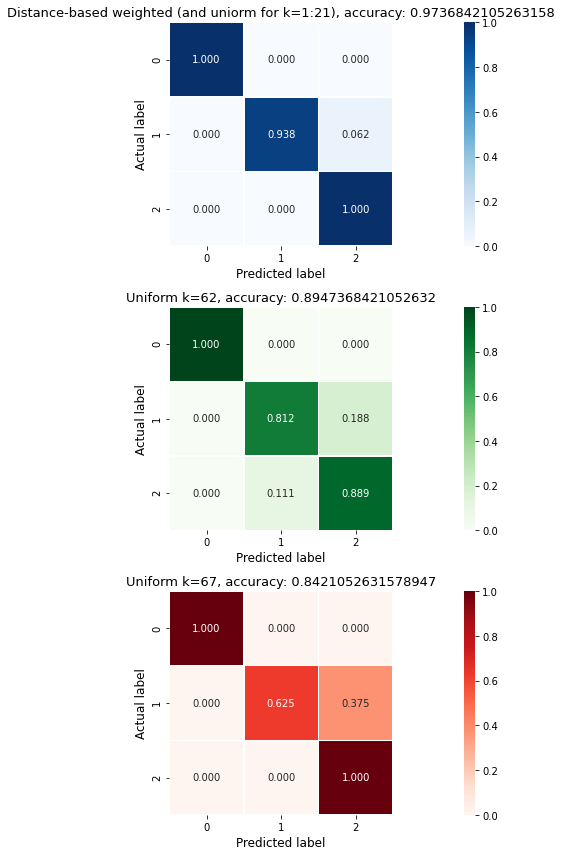

In [ ]:
neighbors = 62
neighbors2 = 67

knn_distance = KNeighborsClassifier(n_neighbors=neighbors, weights='distance') 
knn_uniform = KNeighborsClassifier(n_neighbors=neighbors) 
knn_uniform2 = KNeighborsClassifier(n_neighbors=neighbors2) 

#Train the models using the training sets
knn_distance.fit(x_train, y_train)
knn_uniform.fit(x_train, y_train)
knn_uniform2.fit(x_train, y_train)

#Predict the response for test dataset
y_pred_distance = knn_distance.predict(x_test)
y_pred_uniform = knn_uniform.predict(x_test)
y_pred_uniform2 = knn_uniform2.predict(x_test)

#create a nomarized confusion matrix
cm_knn_distance = metrics.confusion_matrix(y_test, y_pred_distance, normalize='true')
cm_knn_uniform = metrics.confusion_matrix(y_test, y_pred_uniform,  normalize='true')
cm_knn_uniform2 = metrics.confusion_matrix(y_test, y_pred_uniform2,  normalize='true')

# Use the score method to get the accuracy of model
score_distance = knn_distance.score(x_test, y_test)
score_uniform = knn_uniform.score(x_test, y_test)
score_uniform2 = knn_uniform2.score(x_test, y_test)

#plot
fig, axs = plt.subplots(figsize=(20,12), nrows=3)
sns.heatmap(cm_knn_distance, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues', ax=axs[0])
sns.heatmap(cm_knn_uniform, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens', ax=axs[1])
sns.heatmap(cm_knn_uniform2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds', ax=axs[2] )


axs[0].set_title('Distance-based weighted (and uniorm for k=1:21), accuracy: {0}'.format(score_distance), size=13)
axs[0].set_ylabel('Actual label',size=12)
axs[0].set_xlabel('Predicted label',size=12)
axs[1].set_title('Uniform k=62, accuracy: {0}'.format(score_uniform), size=13)
axs[1].set_ylabel('Actual label',size=12)
axs[1].set_xlabel('Predicted label',size=12)
axs[2].set_title('Uniform k=67, accuracy: {0}'.format(score_uniform2), size=13)
axs[2].set_ylabel('Actual label',size=12)
axs[2].set_xlabel('Predicted label',size=12)
#axs.set_xticklabels(class_names)
#ax.set_yticklabels(class_names)
plt.tight_layout()
plt.show(); 

Here we have three cofusion matrixes for k nearest neighbour.

The first blue one is when applying distance-based accuracy for all k,
and it also represents a uniform weight of neihgbours when choosing k as a value between 0-21, as we see in our plot in task b.
The blue matrix has the best accuracy of 97 percent.

The second and third, green and red matrix, displays a KNeighborsClassifier that uses uniform weight for all neighbours.
The second matrix with k=62 has an accuracy of almost 90% whilst the third confusion matrix using k=67 only has an accurucy of 84%. 
This drop is also well displayed in our plot in task b. 

We compare these three confusion matrixes (blue, green and red) to the orange confusion matrix in task a.

The method logistic regression got an accuracy of ~87%. 
An immediate comparison we can say that in our case the logistic regression 
therefor represents the knn method using a value of k between 62 and 67.

We conclude that the k nearest neighbour is a more accurate way to predict the correct answer 
(we think it is self-evident that k should be less than half of the data (112/2)).
And adding that this conclusion is for this exact data. 
For other data this can may not be true and therefor this type of comparison should always be done. 


**3. Explain why it is important to use a seperate test (and sometimes validation) set.**

It is important to divide the dataset into different set, a training set and a testing set, in order for the 
models to train on data that is previously not known. The testing set it indepdendent from the training set, but
are of the same type of datapoints but with different values for them. When the model then is used with the test set, it gets an unbiased mesure of performance. The validation set is similar to the test sets, but where
you use it to go back and forth to tweek the algorithms. So if a test set is used multiple times after tweaking,
it just in a sense becomes a validation test; the test set should not affect the model. So in order for our
model to correctly predict unkown results, the training data is used to fit the model. If you would not divide
the sets, then when checking the accuracy and precision of the model would not yield beneficial results. Yes, the
accuracy would become great if test data is used both in training and in testing, but when prompted with new unkown
test data it might not be accurate at all since it was tweaked using false promises.
